 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/Documents/git/vqa/demos/lstm_vgg_demo.ipynb#VGG16-model" data-toc-modified-id="VGG16-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>VGG16 model</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Documents/git/vqa/demos/lstm_vgg_demo.ipynb#Embedding-of-COCO-images" data-toc-modified-id="Embedding-of-COCO-images-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Embedding of COCO images</a></span></li></ul></li><li><span><a href="http://localhost:8888/notebooks/Documents/git/vqa/demos/lstm_vgg_demo.ipynb#LSTM-+-VGG" data-toc-modified-id="LSTM-+-VGG-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LSTM + VGG</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/Documents/git/vqa/demos/lstm_vgg_demo.ipynb#Index-answers" data-toc-modified-id="Index-answers-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Index answers</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/git/vqa/demos/lstm_vgg_demo.ipynb#Prepare-text-data" data-toc-modified-id="Prepare-text-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Prepare text data</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/git/vqa/demos/lstm_vgg_demo.ipynb#Prepare-image-data" data-toc-modified-id="Prepare-image-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Prepare image data</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/git/vqa/demos/lstm_vgg_demo.ipynb#Sanity-check" data-toc-modified-id="Sanity-check-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sanity check</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/git/vqa/demos/lstm_vgg_demo.ipynb#Model-definition" data-toc-modified-id="Model-definition-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Model definition</a></span></li><li><span><a href="http://localhost:8888/notebooks/Documents/git/vqa/demos/lstm_vgg_demo.ipynb#Training" data-toc-modified-id="Training-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Training</a></span></li></ul></li></ul></div>

In [2]:
# Add the path of the main directory
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [3]:
import matplotlib.pyplot as plt
import skimage.io as io
import numpy as np
import random
import keras

from keras.layers import Dense, Dropout, LSTM, multiply
from keras.layers.embeddings import Embedding
from keras.utils import plot_model
from keras.layers import Input
from keras.models import Model



Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
from vqa_api.PythonHelperTools.vqaTools.vqa import VQA

In [5]:
%load_ext autoreload

%autoreload 2

# VGG16 model

In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tools import img_dir, img_file

In [ ]:
# VGG16 model
vgg_model = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', 
                               input_tensor=None, input_shape=None, 
                               pooling=None, classes=1000)

In [ ]:
# Model layers 
layers = vgg_model.layers
for i in range(len(layers)):
    print "--> Layer {}".format(i+1), "\n"
    print layers[i].get_config(), "\n"
    

The fc7 layer is the layer 22, which name is fc2. 

In [ ]:
# fc7 layer
fc7_layer = layers[21]
print fc7_layer.get_config()
fc7_layer_name = fc7_layer.get_config()["name"]
print fc7_layer_name

In [ ]:
# Input shape and output shape of the fc7 layer
print "Input shape:", fc7_layer.input_shape
print "Ouput shape:", fc7_layer.output_shape

In [ ]:
# Weights of the fc7 layer
# Weights shape
print "Weights shape:", fc7_layer.get_weights()[0].shape
# Bias shape
print "Bias shape:", fc7_layer.get_weights()[1].shape

We can also get a Layer by its name:

In [ ]:
# fc7 layer
fc7_layer = vgg_model.get_layer(fc7_layer_name)
fc7_layer.get_config()

## Embedding of COCO images 

In [ ]:
dataDir = r"C:\Users\Nasser Benab\Documents\git\data\vqa"
dataType = "mscoco"

In [ ]:
image_ids = [(9, "train2014"), (25, "train2014")]
# List to store the arrays for images
imgs = []
for image_id in image_ids:
    # Resize the images as VGG inputs
    img = image.load_img(os.path.join(img_dir(dataDir, dataType, 
        image_id[1]), img_file(image_id[1], image_id[0])), target_size=(224, 224)) 
    img = image.img_to_array(img)
    imgs.append(img)
imgs = np.stack(imgs)
# Preprocess the images corresponding to VGG
imgs = preprocess_input(imgs)   

In [ ]:
imgs.shape

In [ ]:
# "Submodel" of VGG until the fc7 layer
vgg_model_fc7 = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

In [ ]:
# Images embedding using the fc7 layer of VGG16
vgg_model_fc7.predict(imgs).shape

# LSTM + VGG

In [6]:
from lstm_vgg import LSTMVGG

In [7]:
dataDir = r"C:\Users\Nasser Benab\Documents\git\data\vqa"

In [8]:
text_vision = LSTMVGG(dataDir)

C:\Users\Nasser Benab\Documents\git\data\vqa\Annotations\mscoco_train2014_annotations.json
--> train2014
loading VQA annotations and questions into memory...
0:00:13.203000
creating index...
index created!
loading VQA annotations and questions into memory...
0:00:07.319000
creating index...
index created!


## Index answers

In [9]:
text_vision.get_most_common_answer()

In [10]:
text_vision.get_top_answers()

In [11]:
text_vision.encode_answers()

In [12]:
text_vision.train_answers_categorical.shape

(248349L, 1000L)

In [13]:
text_vision.test_answers_categorical.shape

(121512L, 1000L)

## Prepare text data 

In [14]:
# Tokenize questions using the vocabulary of the training questions
text_vision.tokenize_questions()

In [15]:
# Number of questions in the train and test set
len(text_vision.train_sequences), len(text_vision.test_sequences)

(248349, 121512)

## Prepare image data

In [16]:
text_vision.process_images()

100%|██████████| 100/100 [00:01<00:00, 53.85it/s]


In [17]:
text_vision.train_images.shape

(300L, 224L, 224L, 3L)

In [18]:
text_vision.test_images.shape

(300L, 224L, 224L, 3L)

## Sanity check  

Let's check that the different data correspond (question, answer and image):

In [19]:
import random
import skimage.io as io

In [20]:
i = random.choice(range(300))
i

128

In [21]:
text_vision.train_questions[i]

u'What color are the skis?'

In [22]:
text_vision.train_answers[i]

u'blue'

In [23]:
# plt.imshow(text_vision.train_images[i])
# plt.show()

## Model definition

In [24]:
# Maximum length for the input questions
input_length = 22

# Vocabulary size from the training set
V = text_vision.vocabulary_size_train
input_dim = V + 1

# Dimension of the vectors (from the paper)
embedding_dim = 300

# The output from the embedding layer is equal to input_length x embedding_dim

In [25]:
# VGG16 model
vgg_model = keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', 
                               input_tensor=None, input_shape=None, 
                               pooling=None, classes=1000)

In [26]:
# "Submodel" of VGG until the fc7 layer
vgg_model_fc7 = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

In [27]:
# Let"s get a tensor with the output of our vision model
image_input = Input(shape=(224, 224, 3))
# Freeze the vision model weights
vgg_model_fc7.trainable = False
fc7 = vgg_model_fc7(image_input)

# Turn the 4096 embedding from the fc7 layer to a 1024 embedding in order to 
# match the questions embedding
encoded_image = Dense(1024, activation="tanh")(fc7)

# Langage model
question_input = Input(shape=(22,), dtype="int32")
embedded_question = Embedding(input_dim=input_dim, output_dim=embedding_dim, 
                              input_length=input_length)(question_input)
encoded_question = LSTM(1024)(embedded_question)

# Point-wise multiplication of the outputs from the vision model and the 
# langage model
merge = multiply([encoded_question, encoded_image])

# Hidden layers with 0.5 dropouts
merge = Dropout(0.5)(merge)
hidden1 = Dense(1000, activation="tanh")(merge)
hidden1 = Dropout(0.5)(hidden1)
hidden2 = Dense(1000, activation="tanh")(hidden1)

# Final softmax layer
output = Dense(1000, activation="softmax")(hidden2)

# This is our final model:
vqa_model = Model(inputs=[image_input, question_input], outputs=output)

# Summarize layers
print(vqa_model.summary())
# Plot graph
# plot_model(model, to_file="vision_model.png")

C:\Users\Nasser Benab\Anaconda2\lib\site-packages\keras\layers\recurrent.py:1923: UserWarning: RNN dropout is no longer supported with the Theano backend due to technical limitations. You can either set `dropout` and `recurrent_dropout` to 0, or use the TensorFlow backend.
  'RNN dropout is no longer supported with the Theano backend '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 22)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 22, 300)      4099800     input_3[0][0]                    
__________________________________________________________________________________________________
model_1 (Model)                 (None, 4096)         134260544   input_2[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LS

## Training 

In [28]:
vqa_model.compile(optimizer="rmsprop", loss="categorical_crossentropy",
              metrics=["accuracy"])

In [29]:
# Number of train and test observations
n_train = 300
n_test = 100

In [30]:
x_train = [text_vision.train_images[:n_train], text_vision.train_sequences[:n_train]]
x_val = [text_vision.test_images[:n_test], text_vision.test_sequences[:n_test]]
y_train = text_vision.train_answers_categorical[:n_train]
y_val = text_vision.test_answers_categorical[:n_test]

In [32]:
history = vqa_model.fit(x_train, y_train, validation_data=(x_val, y_val),
              epochs=1, batch_size=128)

Train on 300 samples, validate on 100 samples
Epoch 1/1
300/300 [==============================] - ETA: 2:05 - loss: 6.9087 - acc: 0.0000e+0 - ETA: 28s - loss: 6.5938 - acc: 0.1406    - 249s 829ms/step - loss: 7.2380 - acc: 0.1533 - val_loss: 9.6598 - val_acc: 0.1500


In [33]:
# List all data in history
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


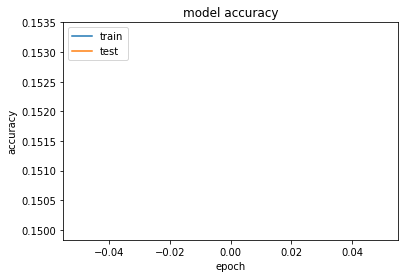

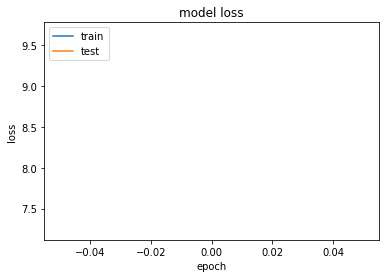

In [34]:
# Summarize history for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# Summarize history for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [35]:
predictions = vqa_model.predict(x_val)

In [45]:
res = text_vision.predictions_to_dic(predictions, text_vision.test_questions_ids[:n_test])
res

[{'answer': 'None', 'question_id': 3506232},
 {'answer': 'None', 'question_id': 3506230},
 {'answer': 'None', 'question_id': 3506231},
 {'answer': 'None', 'question_id': 86472},
 {'answer': 'None', 'question_id': 86470},
 {'answer': 'None', 'question_id': 86471},
 {'answer': 'None', 'question_id': 4344100},
 {'answer': 'None', 'question_id': 4344101},
 {'answer': 'None', 'question_id': 4344102},
 {'answer': 'None', 'question_id': 562050},
 {'answer': 'None', 'question_id': 562051},
 {'answer': 'None', 'question_id': 562052},
 {'answer': 'None', 'question_id': 652272},
 {'answer': 'None', 'question_id': 652270},
 {'answer': 'None', 'question_id': 652271},
 {'answer': 'None', 'question_id': 1034880},
 {'answer': 'None', 'question_id': 1034881},
 {'answer': 'None', 'question_id': 1034882},
 {'answer': 'None', 'question_id': 1240392},
 {'answer': 'None', 'question_id': 1240390},
 {'answer': 'None', 'question_id': 1240391},
 {'answer': 'None', 'question_id': 2002960},
 {'answer': 'None', 'q

In [44]:
answers_ind_val_true = np.argmax(y_val, axis=1)
idx_to_answer = np.vectorize(text_vision.idx_to_answer)
idx_to_answer(answers_ind_val_true)

array([u'wood', u'no', u'None', u'no', u'yes', u'tree', u'yes', u'ladder',
       u'1', u'yes', u'yes', u'no', u'yes', u'None', u'white', u'blue',
       u'no', u'tile', u'None', u'yes', u'None', u'no', u'2', u'None',
       u'None', u'no', u'3', u'market', u'lot', u'4', u'gray', u'no',
       u'yes', u'yes', u'no', u'orange', u'no', u'None', u'no', u'yes',
       u'yes', u'nobody', u'None', u'left', u'yes', u'turkey', u'oven',
       u'no', u'no', u'None', u'yes', u'yes', u'no', u'yes', u'None',
       u'None', u'None', u'taking picture', u'yes', u'white', u'no', u'no',
       u'horse', u'yes', u'yes', u'2', u'head', u'soccer', u'blue',
       u'None', u'no', u'yes', u'restaurant', u'yes', u'candle',
       u'broccoli', u'white', u'no', u'15', u'no', u'yes', u'no', u'4',
       u'no', u'no', u'no', u'no', u'no', u'yes', u'black and white',
       u'sunny', u'None', u'yes', u'8', u'snow', u'no', u'yes', u'None',
       u'yes', u'night'],
      dtype='<U15')